In [1]:
# 📌 Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set styles
sns.set(style="whitegrid")
plt.style.use('ggplot')


In [3]:
# 📌 Step 2: Load Dataset
# Load the CSV
df = pd.read_csv(r"C:\Users\dell\Downloads\owid-covid-data.csv")

# Show first 5 rows
df.head()


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN


In [4]:
# 📌 Step 3: Dataset Info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429435 entries, 0 to 429434
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    429435 non-null  object 
 1   continent                                   402910 non-null  object 
 2   location                                    429435 non-null  object 
 3   date                                        429435 non-null  object 
 4   total_cases                                 411804 non-null  float64
 5   new_cases                                   410159 non-null  float64
 6   new_cases_smoothed                          408929 non-null  float64
 7   total_deaths                                411804 non-null  float64
 8   new_deaths                                  410608 non-null  float64
 9   new_deaths_smoothed                         409378 non-null  float64
 

In [5]:
# 📌 Step 4: Check for Null Values
df.isnull().sum()


iso_code                                        0
continent                                   26525
location                                        0
date                                            0
total_cases                                 17631
                                            ...  
population                                      0
excess_mortality_cumulative_absolute       416024
excess_mortality_cumulative                416024
excess_mortality                           416024
excess_mortality_cumulative_per_million    416024
Length: 67, dtype: int64

In [13]:
# 📌 Step 5: Convert Date Column to DateTime
df['date'] = pd.to_datetime(df['date'])

# Add Active Cases column
df['Active'] = df['total_cases'] - df['total_deaths'] - df['new_cases']

df.head()


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,Active
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN,0.0
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN,0.0
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN,0.0
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN,0.0
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN,0.0


In [18]:
# 📌 Step 6: Summary of Global Cases on the Latest Date
latest_date = df['date'].max()
latest_data = df[df['date'] == latest_date].copy()  # 👈 Added .copy() here

# Calculate Active Cases (Total - Deaths)
latest_data['Active'] = latest_data['total_cases'] - latest_data['total_deaths']

# Summarize Global Numbers
global_summary = latest_data[['total_cases', 'total_deaths', 'Active']].sum()

print("🌍 Global Summary on", latest_date.date())
print(global_summary)


🌍 Global Summary on 2024-08-14
total_cases     0.0
total_deaths    0.0
Active          0.0
dtype: float64


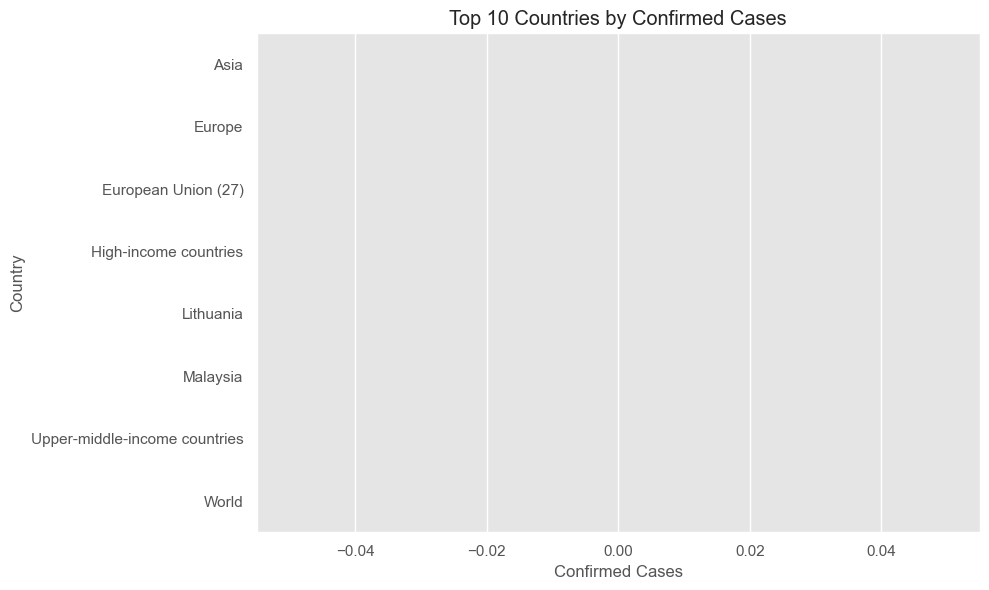

In [21]:
# 📌 Step 7: Top 10 Countries by Confirmed Cases
top10_confirmed = latest_data.sort_values(by='total_cases', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(
    x='total_cases',
    y='location',
    hue='location',
    data=top10_confirmed,
    palette='Reds_r',
    legend=False
)

plt.title('Top 10 Countries by Confirmed Cases')
plt.xlabel('Confirmed Cases')
plt.ylabel('Country')
plt.tight_layout()
plt.show()



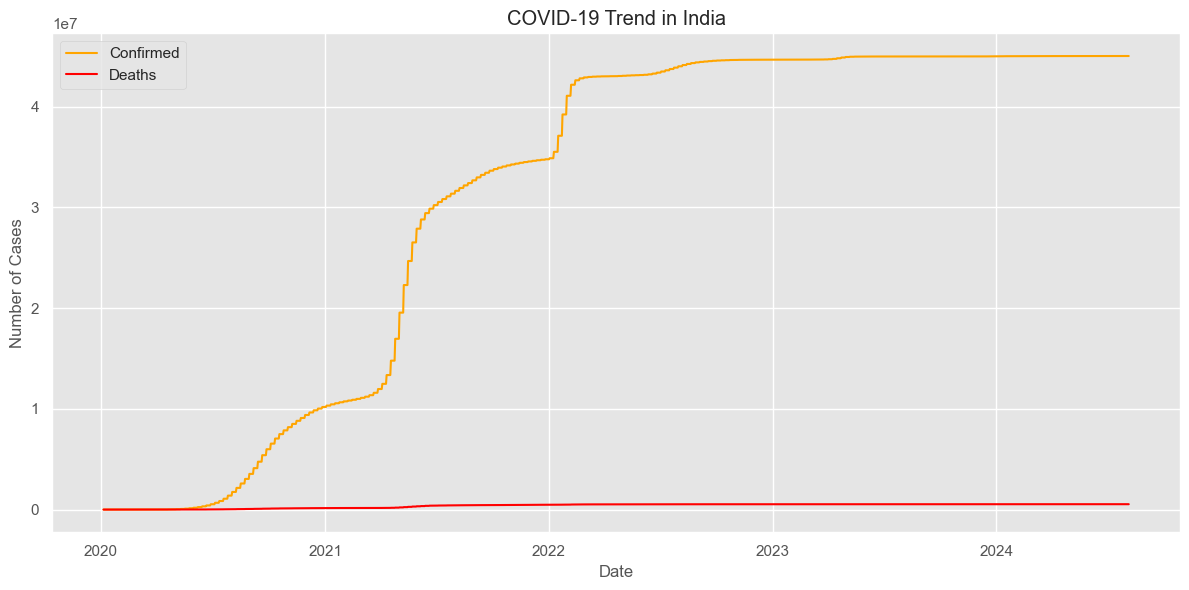

In [22]:
# 📌 Step 8: Line Chart - Confirmed Cases Over Time (India Example)

# Filter data for India
india_data = df[df['location'] == 'India'].copy()

# Convert 'date' column to datetime if not already
india_data['date'] = pd.to_datetime(india_data['date'])

# Plot the trends
plt.figure(figsize=(12, 6))
plt.plot(india_data['date'], india_data['total_cases'], label='Confirmed', color='orange')
plt.plot(india_data['date'], india_data['total_deaths'], label='Deaths', color='red')

plt.title('COVID-19 Trend in India')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [24]:
# 📌 Step 9: Pie Chart of Global Stats (Latest Date)

# Get latest date and filter the data
latest_date = df['date'].max()
latest_data = df[df['date'] == latest_date].copy()

# Calculate Active cases if not present
latest_data['Active'] = latest_data['total_cases'] - latest_data['total_deaths']

# Create global summary and remove any NaN or 0 values
global_summary = latest_data[['total_cases', 'total_deaths', 'Active']].sum()
global_summary.index = ['Confirmed', 'Deaths', 'Active']
global_summary = global_summary.dropna()              # Drop NaNs
global_summary = global_summary[global_summary > 0]   # Drop 0s

# Pie chart setup
colors = ['gold', 'lightcoral', 'lightskyblue']
explode = (0.1,) + (0,) * (len(global_summary) - 1)   # Adjust explode length dynamically

# Plot only if data is available
if not global_summary.empty:
    plt.figure(figsize=(8, 8))
    plt.pie(global_summary, labels=global_summary.index, autopct='%1.1f%%',
            startangle=140, colors=colors[:len(global_summary)], explode=explode, shadow=True)
    plt.title('Global COVID-19 Cases Distribution')
    plt.show()
else:
    print("No valid data to plot pie chart.")


No valid data to plot pie chart.
